## Import Libraries

In [1]:
import numpy as np
import os
import glob            
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

In [5]:
import tensorflow.keras
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import backend as K

/anaconda3/envs/lm_36/lib/python3.6/site-packages/h5py/__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


## Config File Used

To download data using from [Development Seed's Label Maker](https://github.com/developmentseed/label-maker), which provides imagery chips, and labeles derived from Open Street Map, OSM, data. 

* AOI: Oakland/Berkeley, CA

* Object of Interest: Soccer Fields

``` JSON
{ "country": "united_states_of_america",
  "bounding_box": [-122.296, 37.784, -122.149, 37.936],
  "zoom": 16,
  "classes": [
    { "name": "field", "filter": ["==", "sport","baseball"] }
  ],
  "imagery": "http://a.tiles.mapbox.com/v4/mapbox.satellite/{z}/{x}/{y}.jpg?access_token=TOKEN",
  "background_ratio": 1,
  "ml_type": "classification"}

```

## View Subset of Example Data

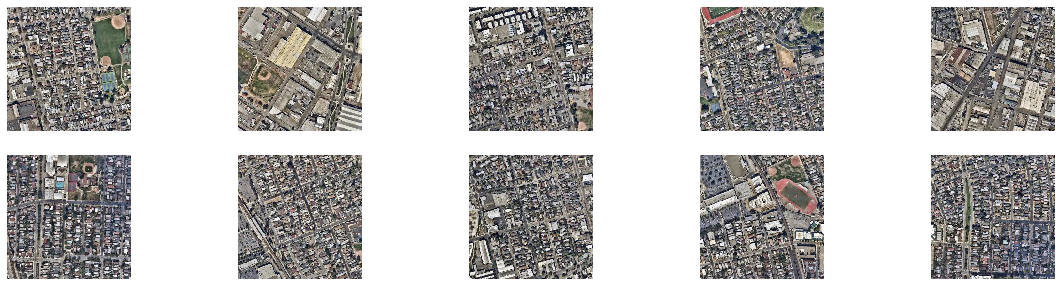

In [39]:
examples_dir = './data/field_data_2/examples/bfield/'

plt.figure(figsize=(20,5))

i = 0
for x in os.listdir(examples_dir):
    plt.subplot(2,5,i+1)
    plt.axis('off')
    img = mpimg.imread(examples_dir + x)
    plt.imshow(img)
    i +=1 
    
plt.show()    

## Load in Data

In [43]:
npz = np.load('./data/field_data_2/data.npz')
x_train = npz['x_train']
y_train = npz['y_train']
x_test = npz['x_test']
y_test = npz['y_test']

## Segmentation Modeling Label Maker Building Data

## Config File


To download data using from [Development Seed's Label Maker](https://github.com/developmentseed/label-maker), which provides imagery chips, and labeles derived from Open Street Map, OSM, data. 

* AOI: Oakland/Berkeley, CA

* Object of Interest: Buildings

```json
{
    "country": "united_states_of_america",
  "bounding_box": [-122.296, 37.784, -122.149, 37.936],
  "zoom": 16,
  "classes": [
    { "name": "building", "filter": ["has", "building"] }
  ],
  "imagery": "http://a.tiles.mapbox.com/v4/mapbox.satellite/{z}/{x}/{y}.jpg?access_token=TOKEN",
  "background_ratio": 1,
  "ml_type": "segmentation"}
```

In [2]:
npz = np.load('/Users/mmorrissey/repos/label-maker/building_data/data.npz')
x_train = npz['x_train']
y_train = npz['y_train']
x_test = npz['x_test']
y_test = npz['y_test']

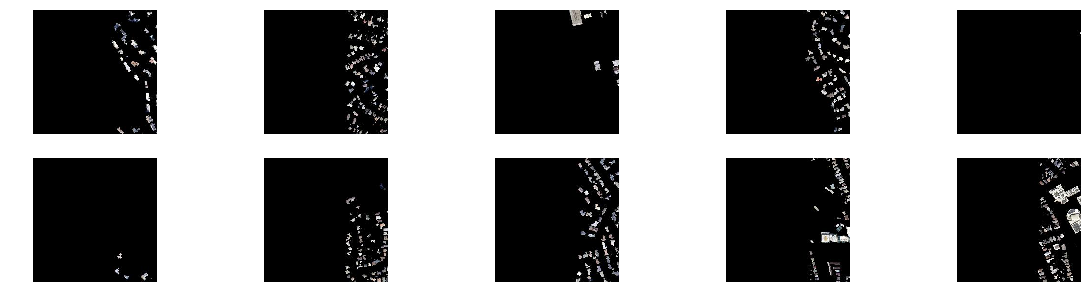

In [3]:
examples_dir = '/Users/mmorrissey/repos/label-maker/building_data/examples/building/'

plt.figure(figsize=(20,5))

i = 0
for x in os.listdir(examples_dir):
    plt.subplot(2,5,i+1)
    plt.axis('off')
    img = mpimg.imread(examples_dir + x)
    plt.imshow(img)
    i +=1 
    
plt.show()    

In [15]:

from os import makedirs, path as op
from PIL import Image
import numpy as np
import os
import scipy.misc
labels = np.load('/Users/mmorrissey/repos/sandbox/labels.npz') # The arrays in labels.npz are already 2D, just need to convert the numpy arrays to png 

for label in labels.files:
    new_label_dir = op.join(os.getcwd(), "new_labels")
    if not op.isdir(new_label_dir):
        makedirs(new_label_dir)
    img = labels[label] * 255 # img is uint8 so we need to have the road pixels encoded with 255 instead of 1
    scipy.misc.imsave('{}/{}.png'.format(new_label_dir, label), img)
    #print('Writing {}'.format(label))

Writing 10504-25294-16
Writing 10504-25295-16
Writing 10504-25297-16
Writing 10504-25296-16
Writing 10504-25298-16
Writing 10504-25302-16
Writing 10504-25300-16
Writing 10504-25299-16
Writing 10504-25308-16
Writing 10504-25307-16
Writing 10504-25314-16
Writing 10504-25310-16
Writing 10504-25313-16
Writing 10504-25311-16
Writing 10504-25301-16
Writing 10504-25309-16
Writing 10504-25317-16
Writing 10504-25315-16
Writing 10504-25312-16
Writing 10504-25303-16
Writing 10504-25316-16
Writing 10504-25319-16
Writing 10504-25321-16
Writing 10504-25325-16
Writing 10504-25306-16
Writing 10504-25304-16
Writing 10504-25327-16
Writing 10504-25305-16
Writing 10504-25328-16
Writing 10504-25324-16
Writing 10505-25295-16
Writing 10504-25323-16
Writing 10505-25296-16
Writing 10504-25322-16
Writing 10505-25297-16
Writing 10505-25307-16
Writing 10505-25298-16
Writing 10505-25308-16
Writing 10505-25306-16
Writing 10505-25300-16
Writing 10505-25310-16
Writing 10505-25299-16
Writing 10505-25309-16
Writing 105

Writing 10519-25301-16
Writing 10519-25307-16
Writing 10519-25306-16
Writing 10519-25305-16
Writing 10519-25309-16
Writing 10519-25310-16
Writing 10517-25328-16
Writing 10519-25311-16
Writing 10518-25325-16
Writing 10519-25312-16
Writing 10519-25313-16
Writing 10518-25322-16
Writing 10519-25314-16
Writing 10519-25318-16
Writing 10518-25326-16
Writing 10519-25315-16
Writing 10519-25319-16
Writing 10518-25324-16
Writing 10518-25323-16
Writing 10519-25320-16
Writing 10519-25317-16
Writing 10519-25316-16
Writing 10518-25328-16
Writing 10518-25327-16
Writing 10519-25321-16
Writing 10520-25306-16
Writing 10520-25312-16
Writing 10519-25322-16
Writing 10520-25313-16
Writing 10520-25314-16
Writing 10519-25324-16
Writing 10520-25315-16
Writing 10519-25325-16
Writing 10519-25323-16
Writing 10520-25316-16
Writing 10520-25317-16
Writing 10520-25320-16
Writing 10520-25318-16
Writing 10519-25326-16
Writing 10520-25321-16
Writing 10520-25319-16
Writing 10519-25328-16
Writing 10519-25327-16
Writing 105

Writing 10526-25302-16
Writing 10526-25303-16
Writing 10526-25304-16
Writing 10526-25305-16
Writing 10526-25306-16
Writing 10526-25307-16
Writing 10526-25308-16
Writing 10526-25309-16
Writing 10526-25310-16
Writing 10526-25311-16
Writing 10526-25313-16
Writing 10526-25314-16
Writing 10526-25315-16
Writing 10526-25316-16
Writing 10526-25317-16
Writing 10526-25318-16
Writing 10526-25319-16
Writing 10527-25293-16
Writing 10527-25294-16
Writing 10527-25295-16
Writing 10527-25296-16
Writing 10527-25297-16
Writing 10527-25298-16
Writing 10527-25299-16
Writing 10527-25300-16
Writing 10527-25301-16
Writing 10527-25302-16
Writing 10527-25303-16
Writing 10527-25304-16
Writing 10527-25305-16
Writing 10527-25306-16
Writing 10527-25307-16
Writing 10527-25308-16
Writing 10527-25309-16
Writing 10527-25310-16
Writing 10527-25312-16
Writing 10527-25313-16
Writing 10527-25314-16
Writing 10527-25315-16
Writing 10527-25316-16
Writing 10527-25317-16
Writing 10527-25318-16
Writing 10527-25319-16
Writing 105

In [16]:
tiles = 'tiles/'

## Segmentation Modeling 

Model code from [Pixel Decoder](https://github.com/Geoyi/pixel-decoder)

In [56]:
!pixel_decoder train --batch_size=4 \
                    --imgs_folder=tiles \
                    --masks_folder=new_labels \
                    --models_folder=trained_models_out2 \
                    --model_id=resnet_unet \
                    --origin_shape_no=256 \
                    --border_no=32

/anaconda3/envs/lm_36/lib/python3.6/site-packages/h5py/__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.
2019-08-25 21:09:16.357512: I tensorflow/core/platform/cpu_feature_guard.cc:141] Your CPU supports instructions that this TensorFlow binary was not compiled to use: AVX2 FMA
steps_per_epoch 51 validation_steps 17
Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 256, 256, 3)  0                                            
__________________________________________________________________________________________________
conv1 (Conv2D)                  (

Epoch 1/10
 - 272s - loss: 0.6510 - dice_coef: 0.3147 - dice_coef_rounded: 0.3592 - binary_crossentropy: 0.4565 - val_loss: 0.9254 - val_dice_coef: 0.0237 - val_dice_coef_rounded: 0.0589 - val_binary_crossentropy: 0.6372
Epoch 2/10
 - 275s - loss: 0.5650 - dice_coef: 0.4046 - dice_coef_rounded: 0.4319 - binary_crossentropy: 0.3928 - val_loss: 0.9489 - val_dice_coef: 0.0109 - val_dice_coef_rounded: 0.0589 - val_binary_crossentropy: 0.7208
Epoch 3/10
 - 302s - loss: 0.5107 - dice_coef: 0.4624 - dice_coef_rounded: 0.4869 - binary_crossentropy: 0.3580 - val_loss: 0.9676 - val_dice_coef: 0.0045 - val_dice_coef_rounded: 0.0589 - val_binary_crossentropy: 0.8097
Epoch 4/10
 - 339s - loss: 0.5458 - dice_coef: 0.4279 - dice_coef_rounded: 0.4494 - binary_crossentropy: 0.3968 - val_loss: 0.9706 - val_dice_coef: 0.0038 - val_dice_coef_rounded: 0.0589 - val_binary_crossentropy: 0.8255
Epoch 5/10
 - 294s - loss: 0.4885 - dice_coef: 0.4894 - dice_coef_rounded: 0.5124 - binary_crossentropy: 0.3634 - va

 - 262s - loss: 0.3198 - dice_coef: 0.5607 - dice_coef_rounded: 0.6063 - binary_crossentropy: 0.2004 - val_loss: 0.4070 - val_dice_coef: 0.5028 - val_dice_coef_rounded: 0.5388 - val_binary_crossentropy: 0.3168
Epoch 10/10
 - 261s - loss: 0.3294 - dice_coef: 0.5626 - dice_coef_rounded: 0.6110 - binary_crossentropy: 0.2215 - val_loss: 0.3838 - val_dice_coef: 0.5282 - val_dice_coef_rounded: 0.5642 - val_binary_crossentropy: 0.2958
Epoch 1/10
 - 267s - loss: 0.3306 - dice_coef: 0.5427 - dice_coef_rounded: 0.5893 - binary_crossentropy: 0.2038 - val_loss: 0.3845 - val_dice_coef: 0.4988 - val_dice_coef_rounded: 0.5454 - val_binary_crossentropy: 0.2677
Epoch 2/10
 - 265s - loss: 0.3209 - dice_coef: 0.5597 - dice_coef_rounded: 0.6083 - binary_crossentropy: 0.2015 - val_loss: 0.3829 - val_dice_coef: 0.5081 - val_dice_coef_rounded: 0.5560 - val_binary_crossentropy: 0.2739
Epoch 3/10
 - 265s - loss: 0.3133 - dice_coef: 0.5663 - dice_coef_rounded: 0.6106 - binary_crossentropy: 0.1928 - val_loss: 0.

 - 263s - loss: 0.2350 - dice_coef: 0.5571 - dice_coef_rounded: 0.6224 - binary_crossentropy: 0.1658 - val_loss: 0.3131 - val_dice_coef: 0.5046 - val_dice_coef_rounded: 0.5637 - val_binary_crossentropy: 0.2524
Epoch 27/50
 - 262s - loss: 0.2229 - dice_coef: 0.5899 - dice_coef_rounded: 0.6605 - binary_crossentropy: 0.1605 - val_loss: 0.3117 - val_dice_coef: 0.5210 - val_dice_coef_rounded: 0.5804 - val_binary_crossentropy: 0.2559
Epoch 28/50
 - 263s - loss: 0.2329 - dice_coef: 0.5637 - dice_coef_rounded: 0.6295 - binary_crossentropy: 0.1651 - val_loss: 0.3172 - val_dice_coef: 0.5137 - val_dice_coef_rounded: 0.5695 - val_binary_crossentropy: 0.2608
Epoch 29/50
 - 262s - loss: 0.2353 - dice_coef: 0.5595 - dice_coef_rounded: 0.6318 - binary_crossentropy: 0.1669 - val_loss: 0.3200 - val_dice_coef: 0.4955 - val_dice_coef_rounded: 0.5476 - val_binary_crossentropy: 0.2585
Epoch 30/50
 - 262s - loss: 0.2286 - dice_coef: 0.5729 - dice_coef_rounded: 0.6464 - binary_crossentropy: 0.1624 - val_loss:

 - 262s - loss: 0.3474 - dice_coef: 0.6292 - dice_coef_rounded: 0.6536 - binary_crossentropy: 0.2149 - val_loss: 0.4125 - val_dice_coef: 0.5699 - val_dice_coef_rounded: 0.5924 - val_binary_crossentropy: 0.3128
Epoch 14/50
 - 262s - loss: 0.3671 - dice_coef: 0.6055 - dice_coef_rounded: 0.6294 - binary_crossentropy: 0.2120 - val_loss: 0.4217 - val_dice_coef: 0.5605 - val_dice_coef_rounded: 0.5822 - val_binary_crossentropy: 0.3207
Epoch 15/50
 - 262s - loss: 0.3539 - dice_coef: 0.6190 - dice_coef_rounded: 0.6426 - binary_crossentropy: 0.2001 - val_loss: 0.4304 - val_dice_coef: 0.5510 - val_dice_coef_rounded: 0.5721 - val_binary_crossentropy: 0.3249
Epoch 16/50
 - 261s - loss: 0.3277 - dice_coef: 0.6468 - dice_coef_rounded: 0.6713 - binary_crossentropy: 0.1834 - val_loss: 0.4112 - val_dice_coef: 0.5734 - val_dice_coef_rounded: 0.5939 - val_binary_crossentropy: 0.3235
Epoch 17/50
 - 262s - loss: 0.3327 - dice_coef: 0.6479 - dice_coef_rounded: 0.6712 - binary_crossentropy: 0.2229 - val_loss:

In [59]:

new_label_dir = op.join(os.getcwd(), "test_tiles/")
if not op.isdir(new_label_dir):
    makedirs(new_label_dir)

from os import path, listdir, mkdir
for f in listdir(path.join("tiles/")):
    print(f)
    img = "/Users/mmorrissey/repos/sandbox/tiles/" + f
    im = Image.open(img)
    im.save(('test_tiles/' + f).replace(".jpg",".tif"))

In [58]:
!pixel_decoder predict --imgs_folder=tiles \
                       --test_folder=test_tiles \
                      --models_folder=trained_models_out2 \
                      --pred_folder=predictions \
                      --model_id=resnet_unet \
                      --origin_shape_no=256

/anaconda3/envs/lm_36/lib/python3.6/site-packages/h5py/__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.
2019-08-26 07:47:16.785207: I tensorflow/core/platform/cpu_feature_guard.cc:141] Your CPU supports instructions that this TensorFlow binary was not compiled to use: AVX2 FMA
100%|█████████████████████████████████████████| 272/272 [05:50<00:00,  1.29s/it]


In [60]:

tiles =sorted(glob.glob("tiles_road/*.jpg"))

def grey2rgb(img):
    """
    Create model prediction result to 3 channel
    """
    new_img = []
    for i in range(img.shape[0]):
        for j in range(img.shape[1]):
            new_img.append([img[i][j]]*3)
    new_img = np.array(new_img).reshape(img.shape[0], img.shape[1], 3)
    return new_img

In [61]:
preds = listdir(path.join("/Users/mmorrissey/repos/sandbox/predictions/resnet_unet/"))

In [62]:
pred_list = [op.basename(f).split(".")[0] for f in preds]

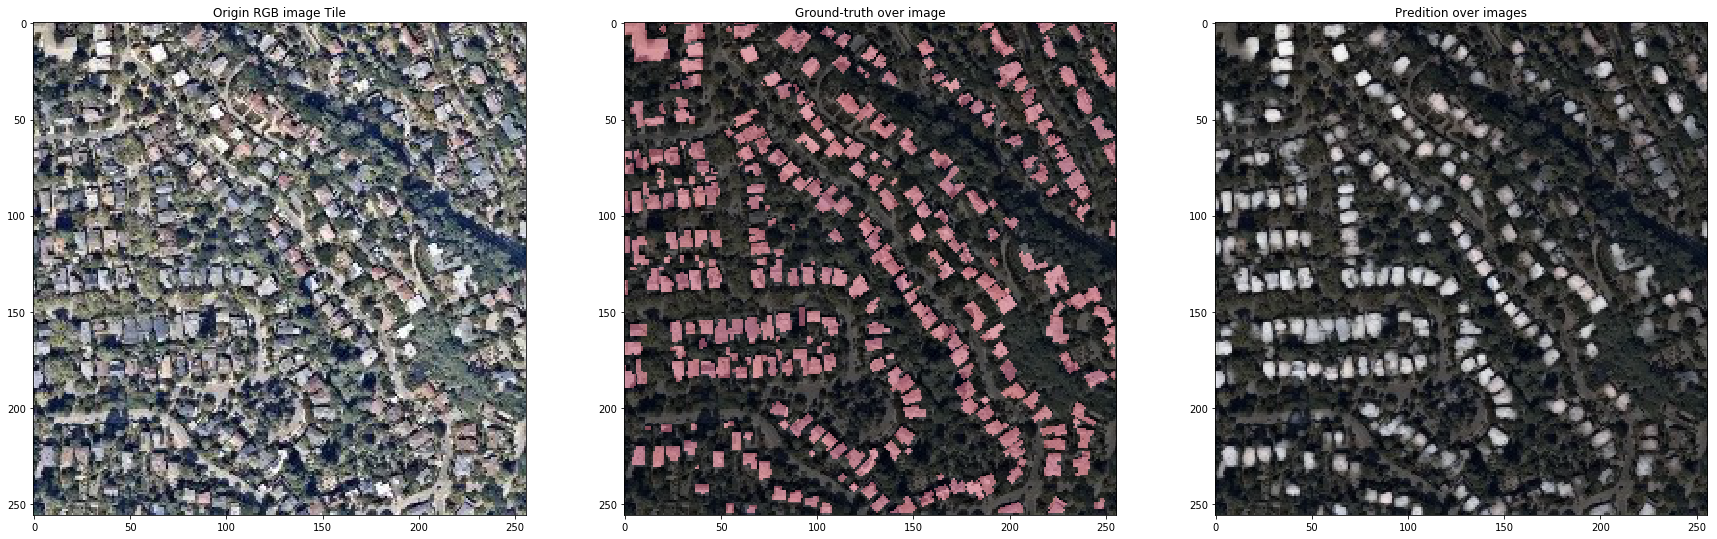

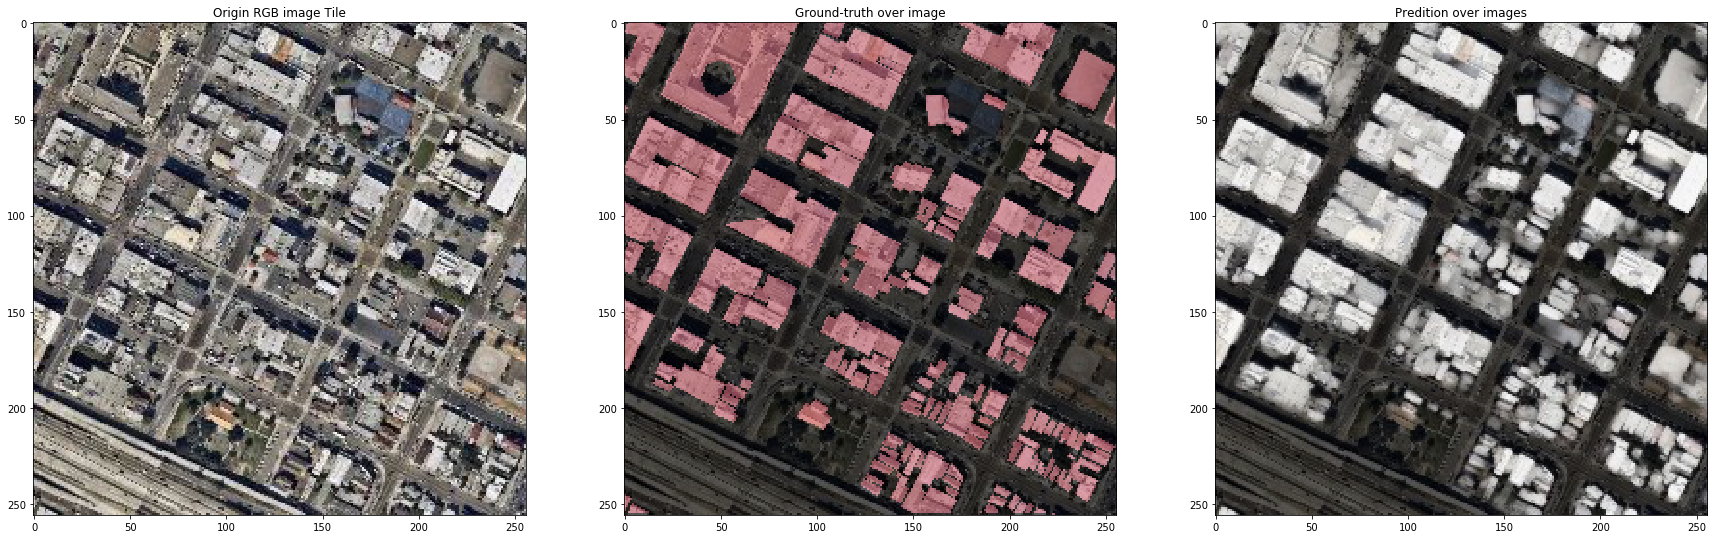

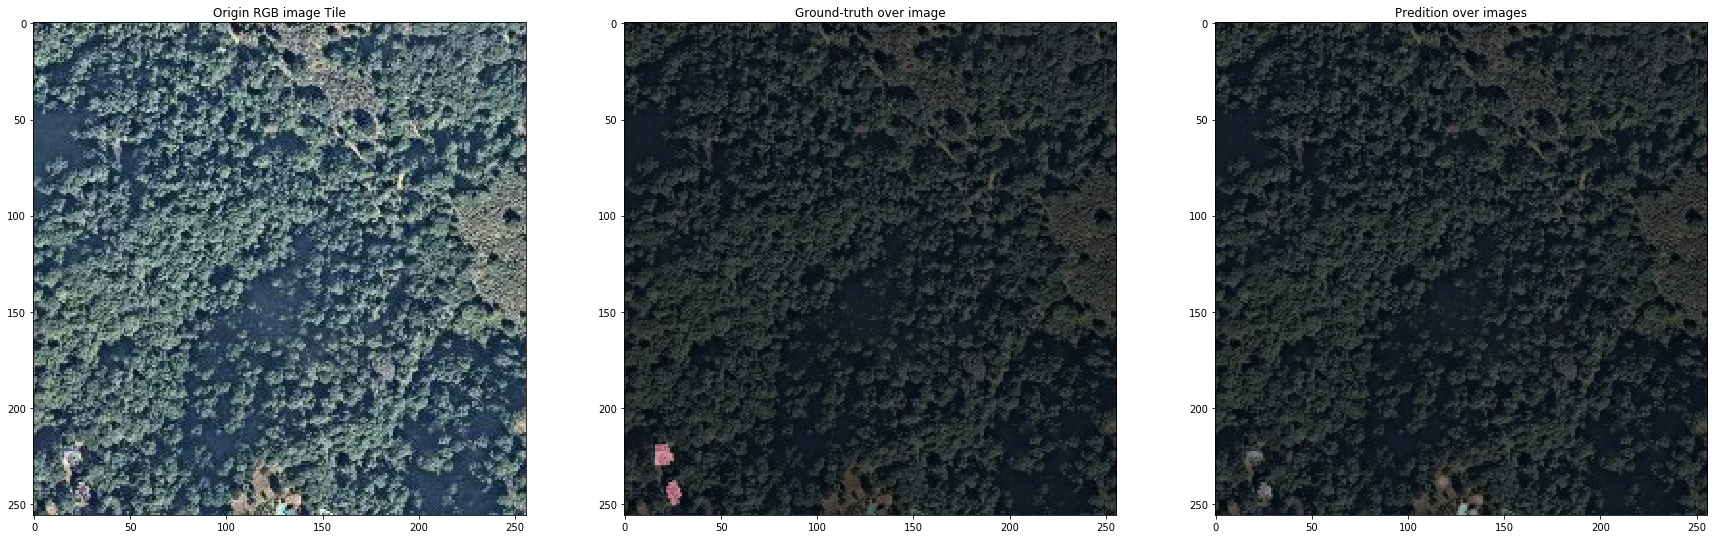

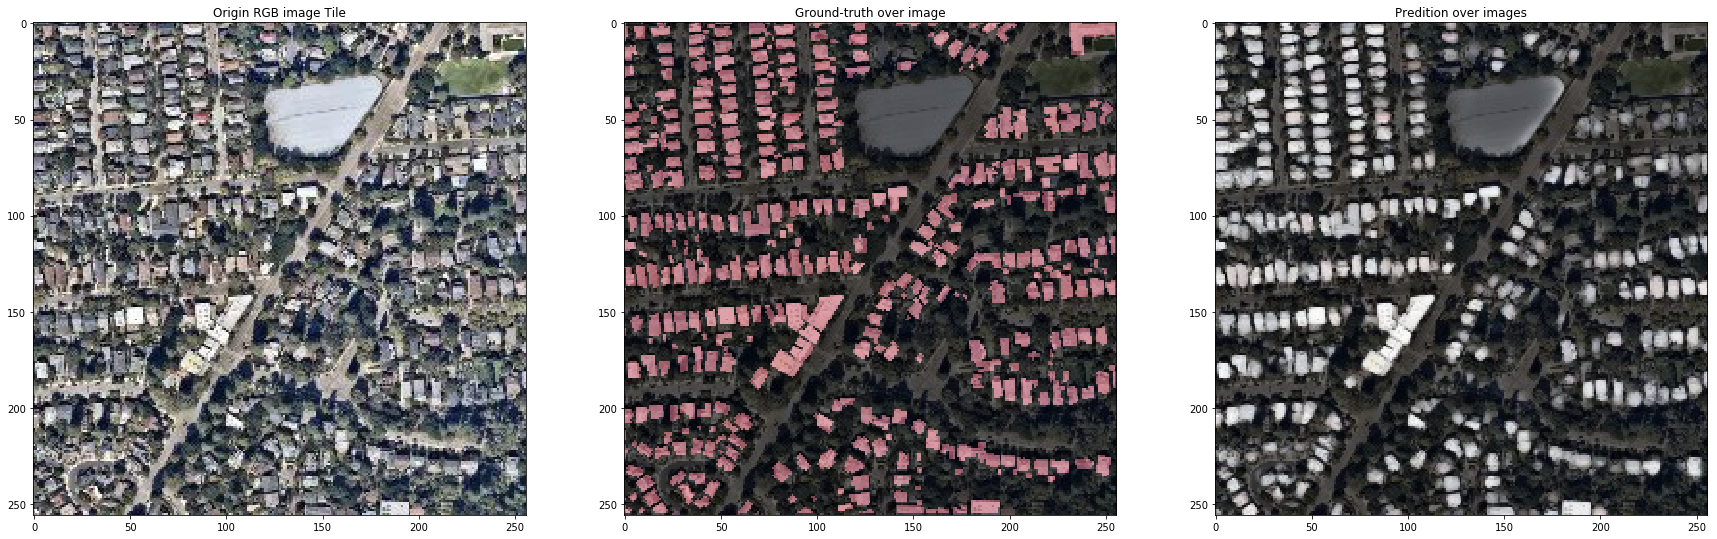

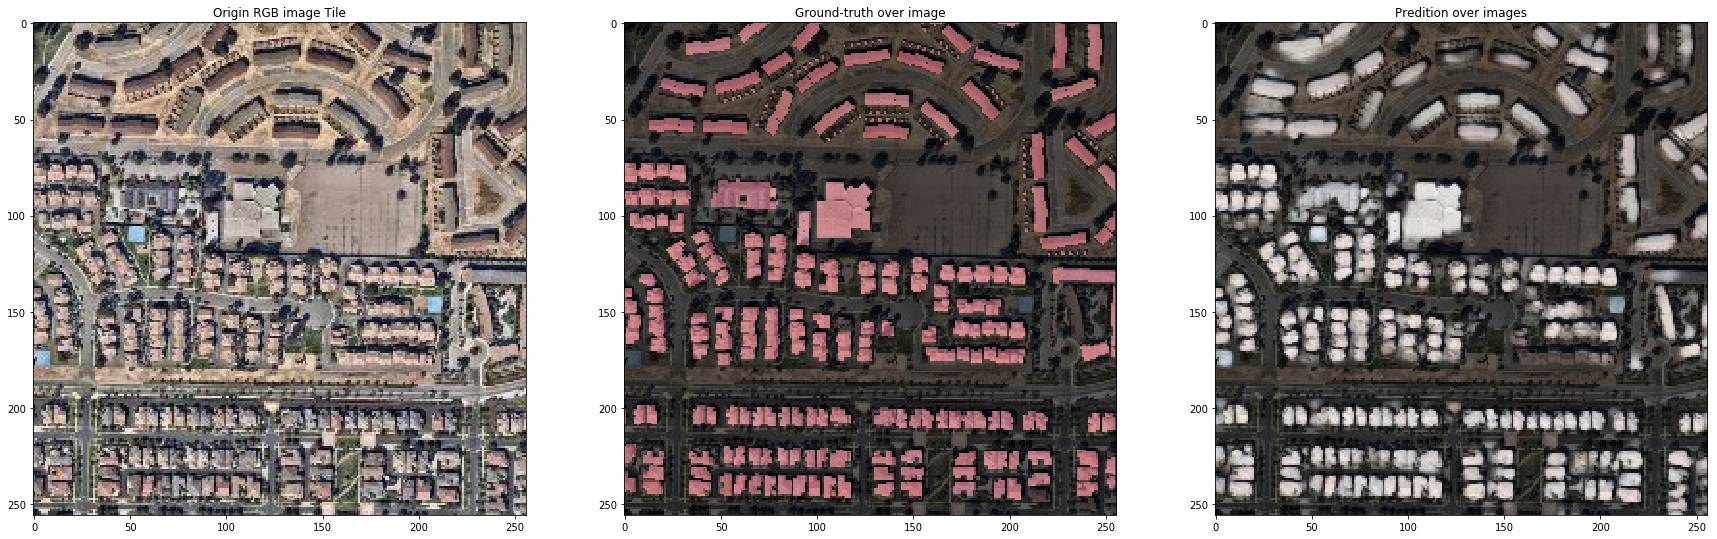

In [63]:
#model training stopped early,

new_label_dir = op.join(os.getcwd(), "result_figures2")
if not op.isdir(new_label_dir):
    makedirs(new_label_dir)

for pred in pred_list[0:5]:
    img = mpimg.imread("tiles/{}.jpg".format(pred))
    mask = mpimg.imread("labels/{}.png".format(pred))
    pred_mask = grey2rgb(mpimg.imread("predictions/resnet_unet/{}.png".format(pred)))
    masked = np.ma.masked_where(pred_mask >=1, pred_mask) 

    fig, ax =  plt.subplots(1, 3, figsize=(30, 10))
    ax[-3].imshow(img, 'gray', interpolation='none')
    ax[-3].set_title('Origin RGB image Tile')

    ax[-2].imshow(img, 'gray', interpolation='none')
    ax[-2].imshow(mask, 'jet', interpolation='none', alpha=0.6)
    ax[-2].set_title('Ground-truth over image')

    ax[-1].imshow(img, 'gray', interpolation='none')
    ax[-1].imshow(masked, 'jet', interpolation='none', alpha=0.6)
    ax[-1].set_title('Predition over images')

    fig.savefig("result_figures/tz_roads_pred_{}.png".format(pred))